In [10]:
# librerias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

## Cargar datos

In [2]:

# Cargar el archivo Excel
file_path = 'Caso-Practico-Bam-2023.xlsx'  

# Leer la hoja de cuentas de ahorro y las  tasas de las cuentas de ahorro
try:
    utilidad = pd.read_excel(file_path, sheet_name='Utilidad')
    print("Datos cargados correctamente.")
except Exception as e:
    print(f"Error al cargar el archivo: {e}")


Datos cargados correctamente.


In [3]:
utilidad.head()

,Volumen,Precio,Utilidad
0,15,70,156
1,16,65,157
2,24,71,177
3,13,64,145
4,21,84,197


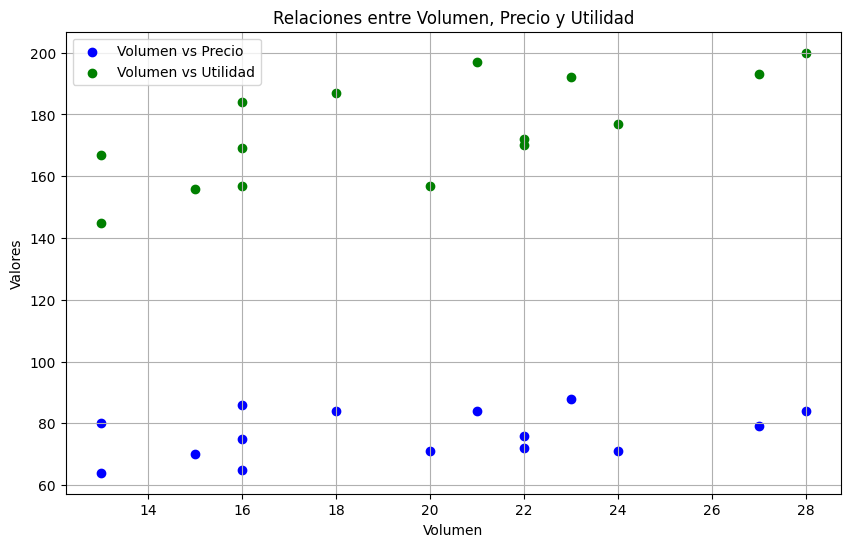

In [5]:
# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar Volumen vs Precio
plt.scatter(utilidad['Volumen'], utilidad['Precio'], color='blue', label='Volumen vs Precio')

# Graficar Volumen vs Utilidad
plt.scatter(utilidad['Volumen'], utilidad['Utilidad'], color='green', label='Volumen vs Utilidad')

# Etiquetas y título
plt.title('Relaciones entre Volumen, Precio y Utilidad')
plt.xlabel('Volumen')
plt.ylabel('Valores')
plt.legend()
plt.grid()

# Mostrar el gráfico
plt.show()


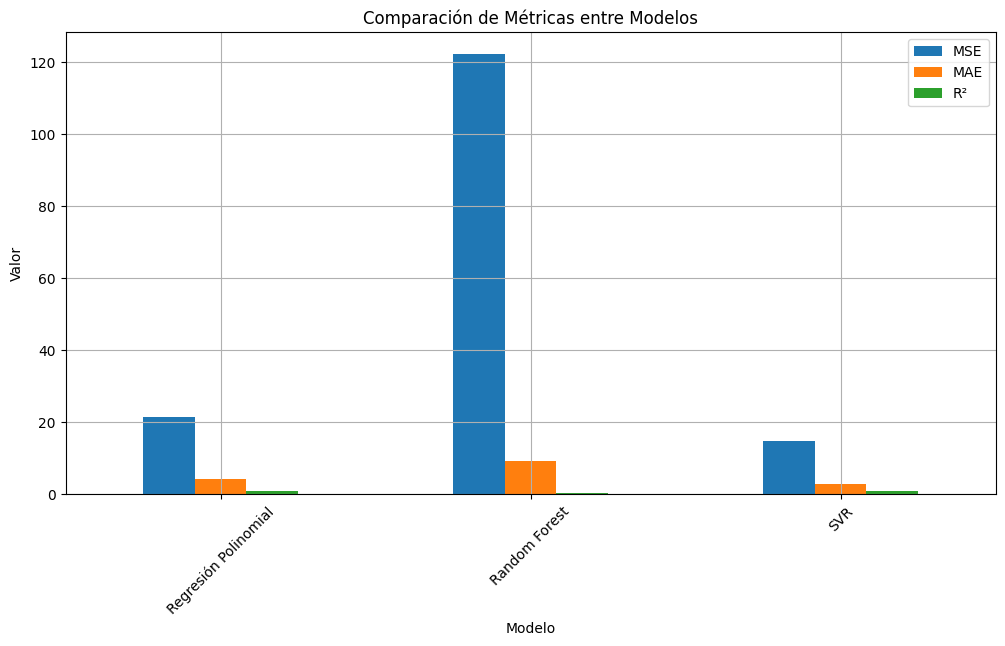

                 Modelo         MSE       MAE        R²
0  Regresión Polinomial   21.588308  4.182988  0.908091
1         Random Forest  122.000100  9.196667  0.480605
2                   SVR   14.774022  2.990595  0.937102


In [8]:
# Variables independientes y dependientes
X = utilidad[['Volumen', 'Precio']]
y = utilidad['Utilidad']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Regresión Polinomial
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
from sklearn.linear_model import LinearRegression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# 2. Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# 3. SVR
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train_scaled)
y_pred_svr_scaled = svr_model.predict(X_test_scaled)
y_pred_svr = scaler_y.inverse_transform(y_pred_svr_scaled.reshape(-1, 1))
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Comparar errores y R²
errors = {
    "Modelo": ["Regresión Polinomial", "Random Forest", "SVR"],
    "MSE": [mse_poly, mse_rf, mse_svr],
    "MAE": [mae_poly, mae_rf, mae_svr],
    "R²": [r2_poly, r2_rf, r2_svr]
}
errors_df = pd.DataFrame(errors)

# Gráfica de comparación de errores y R²
errors_df.set_index("Modelo")[["MSE", "MAE", "R²"]].plot(kind="bar", figsize=(12, 6))
plt.title("Comparación de Métricas entre Modelos")
plt.ylabel("Valor")
plt.xlabel("Modelo")
plt.xticks(rotation=45)
plt.legend(["MSE", "MAE", "R²"])
plt.grid()
plt.show()

# Mostrar errores y R²
print(errors_df)



In [9]:
# Predecir utilidad para Precio = 90 y Volumen = 17 usando SVR
nuevo_dato = pd.DataFrame({'Volumen': [17], 'Precio': [90]})
nuevo_dato_scaled = scaler_X.transform(nuevo_dato)
prediccion_scaled = svr_model.predict(nuevo_dato_scaled)
prediccion = scaler_y.inverse_transform(prediccion_scaled.reshape(-1, 1))

print(f"La utilidad estimada para un precio de Q90 y un volumen de 17 es: {prediccion[0][0]:.2f}")


La utilidad estimada para un precio de Q90 y un volumen de 17 es: 185.43
